###### We have the min and max temperatures in a city In India for each months of the year. We would like to find a function to describe this and show it graphically, the dataset given below.
###### Task:
###### 1. fitting it to the periodic function
###### 2. plot the fit
###### Data
###### Max = 39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25
###### Min = 21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18

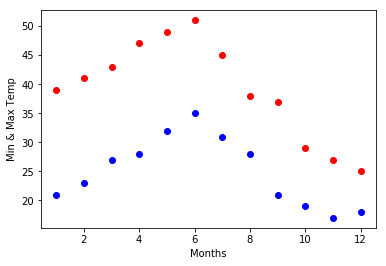

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
max_tmp= np.array([ 39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])
min_tmp= np.array([ 21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])

months= np.arange(1,13,1)
plt.xlabel('Months')
plt.ylabel('Min & Max Temp')
plt.plot(months,min_tmp,'bo')
plt.plot(months,max_tmp,'ro')


1. fitting it to the periodic function

In [2]:
from scipy import optimize
def yearly_tmp(times, avg, ampl, time_offset):
    return (avg
            + ampl * np.cos((times + time_offset) * 1.8 * np.pi / times.max()))

res_max, cov_max = optimize.curve_fit(yearly_tmp, months,
                                      max_tmp, [40, 20, 0])
res_min, cov_min = optimize.curve_fit(yearly_tmp, months,
                                      min_tmp, [-40, 20, 0])

2. plot the fit

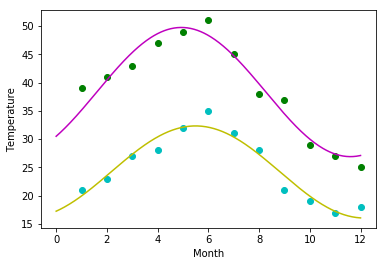

In [3]:
days = np.linspace(0, 12,365)

plt.figure()
plt.plot(months, max_tmp, 'go')
plt.plot(days, yearly_tmp(days, *res_max), 'm-')
plt.plot(months, min_tmp, 'co')
plt.plot(days, yearly_tmp(days, *res_min), 'y-')
plt.xlabel('Month')
plt.ylabel('Temperature')

plt.show()

###### Matplotlib: 
###### This assignment is for visualization using matplotlib:
###### data to use:
######  url=https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv
###### titanic = pd.read_csv(url)
###### Charts to plot:
###### 1. Create a pie chart presenting the male/female proportion
###### 2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

In [7]:
import numpy as np
import pandas as pd

titanic =pd.read_csv("https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv")
titanic.head(5)


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


1. Create a pie chart presenting the male/female proportion

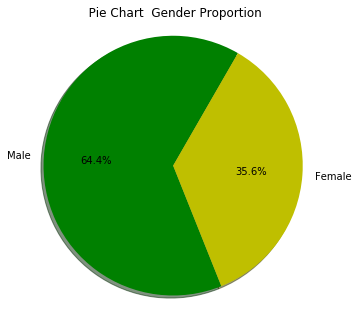

In [48]:
import matplotlib.pyplot as plt
gender_data = titanic['sex'].value_counts()


fig = plt.figure(figsize=(8,4))
ax = fig.add_axes((0,0,0.5,1))
ax.set_title('   Pie Chart  Gender Proportion  ')
labels = 'Male', 'Female'
plt.pie(gender_data,  labels=labels, colors=['g', 'y'],
        autopct='%1.1f%%', shadow=True, startangle=60)
plt.axis('equal')
plt.show()

2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

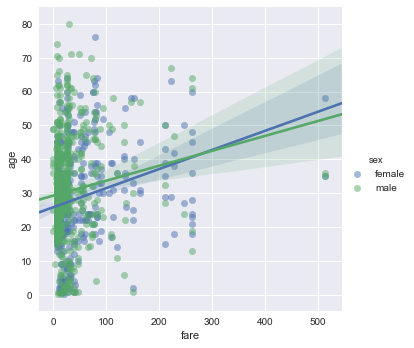

In [52]:
import seaborn as sns

sns.lmplot(x='fare', y='age', data=titanic,
           fit_reg=True,
           hue='sex',
           scatter_kws={'alpha':0.5})